# Analyze Demographic Data From the 1994 Census Database

In [1]:
# !pip install pandas 
# !pip install seaborn
# !pip install matplotlib
# !pip install numpy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="ticks")

In [3]:
data = pd.read_csv("adult.data.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## How many people of each race are represented in this dataset? 

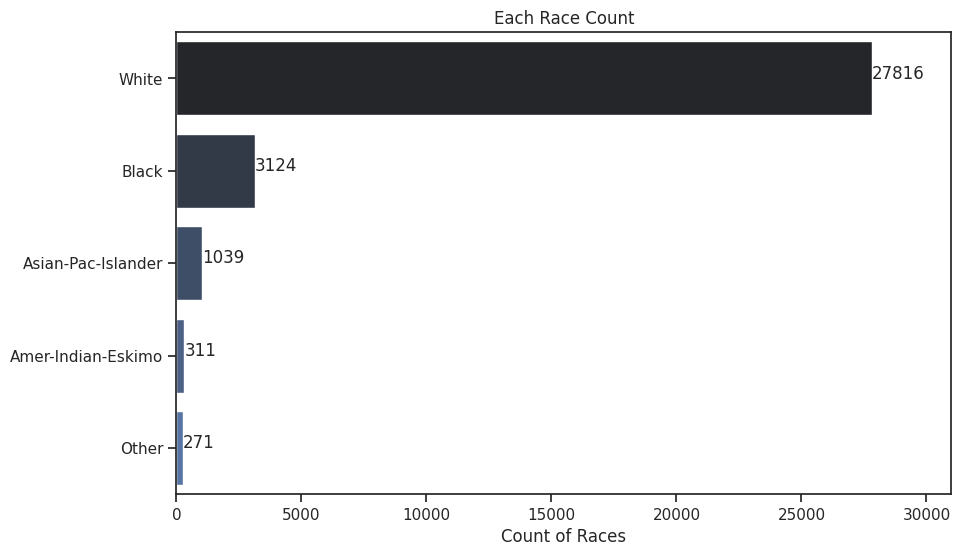

In [4]:
different_races_count = data["race"].value_counts().to_frame()
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=different_races_count, x="count", y=different_races_count.index, hue=different_races_count.index, ax=ax, palette="dark:b")
ax.set_title("Each Race Count")
ax.set_ylabel("")
ax.set_xlabel("Count of Races")
ax.set_xlim(0,31000)
# This print text on plot
for i,j in zip(different_races_count["count"],list(range(5))):
    ax.text(i,j,i)
plt.show()

**Conclusion:** Majority of people are White People.

## What is the average age of men?

In [5]:
# Filering the data set of Make and finding the mean age
avg_age = data[data["sex"]=="Male"]["age"].mean()
print(f"Conclusion: Average Age of me is {avg_age:0.1f}")

Conclusion: Average Age of me is 39.4


## What is the percentage of people who have a Bachelor's degree?

In [6]:
education = data["education"].value_counts().reset_index()
education["percentage"] = (education["count"] / education["count"].sum()) * 100
bachlors_perc = education[education["education"] == "Bachelors"]["percentage"]
print(f"Conclusion: {bachlors_perc.values[0]:0.1f}% of the people have Bachelors Degree.")

Conclusion: 16.4% of the people have Bachelors Degree.


## What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?

In [7]:
advanced_educations = ["Bachelors", "Masters", "Doctorate"]
filtered_data = data[data["education"].isin(advanced_educations)]
df_salary = filtered_data["salary"].value_counts().reset_index()
df_salary["percentage"] = (df_salary["count"] / df_salary["count"].sum()) * 100
percentage = df_salary[df_salary["salary"] == ">50K"]["percentage"]
print(f"Conclusion: {percentage.values[0]:0.1f}% of people with Advanced Eduction make more tha 50K Salary")

Conclusion: 46.5% of people with Advanced Eduction make more tha 50K Salary


## What percentage of people without advanced education make more than 50K?

In [8]:
advanced_educations = ["Bachelors", "Masters", "Doctorate"]
all_educations = data["education"].unique()
unadvanced_education = all_educations[~np.isin(all_educations, advanced_educations)]
unadvanced_education
filtered_data = data[data["education"].isin(unadvanced_education)]
df_salary = filtered_data["salary"].value_counts().reset_index()
df_salary["percentage"] = (df_salary["count"] / df_salary["count"].sum()) * 100
percentage = df_salary[df_salary["salary"] == ">50K"]["percentage"]
print(f"Conclusion: {percentage.values[0]:0.1f}% of people without Advanced Eduction make more tha 50K Salary")

Conclusion: 17.4% of people without Advanced Eduction make more tha 50K Salary


## What is the minimum number of hours a person works per week?

In [9]:
print(f'A person works minumum of {data["hours-per-week"].min()} hour(s) in a week.')

A person works minumum of 1 hour(s) in a week.


## What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?

In [10]:
data_filtered = data[data["hours-per-week"] == data["hours-per-week"].min()]
data_filtered = data_filtered["salary"].value_counts().to_frame()
data_filtered["percentage"] = (data_filtered["count"] / data_filtered["count"].sum()) * 100
print(f'Conclusion: {data_filtered.loc[">50K","percentage"]}% of People who works minimum number of hours per week have a salary of more than 50K.')

Conclusion: 10.0% of People who works minimum number of hours per week have a salary of more than 50K.


## What country has the highest percentage of people that earn >50K and what is that percentage?

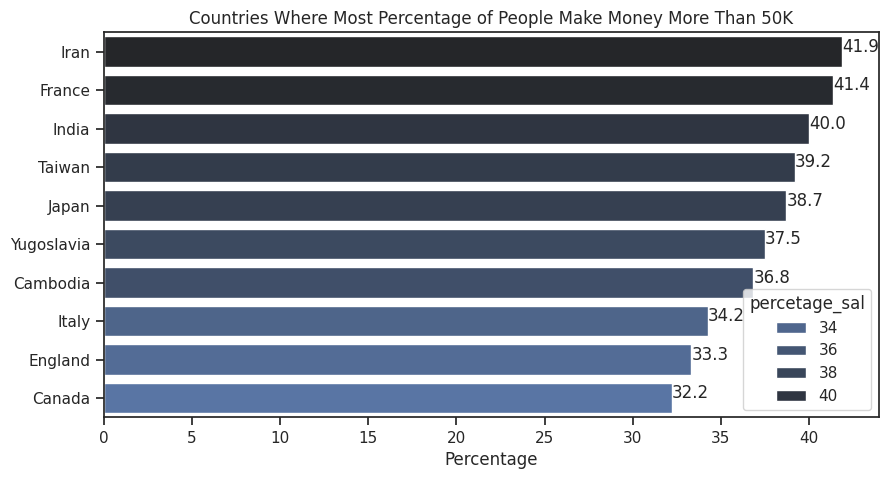

In [ ]:
# Data Manipulationn
# df where i can find total count of <=50k and >50 seperately
df1 = data.groupby(["native-country", "salary"]).agg("size").reset_index(name="count")
# df where i can find total count of <=50k and >50 together
df2 = data.groupby(["native-country"]).agg("size").reset_index(name="total_count")
# merging these two data frames
df = df1.merge(right=df2, on="native-country")
df["percetage_sal"] = (df["count"] / df["total_count"]) * 100
# data data only those who make salary more than 50K
df_filtered = df[df["salary"] == ">50K"].sort_values(by="percetage_sal", ascending=False)

# Data Plotting
top=10
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=df_filtered.head(top), x="percetage_sal", y="native-country", ax=ax, hue="percetage_sal", palette="dark:b_r")
ax.set_title("Countries Where Most Percentage of People Make Money More Than 50K")
ax.set_xlabel("Percentage")
ax.set_ylabel("")
for i,j in zip(df_filtered.head(top)["percetage_sal"],list(range(top))):
    ax.text(i,j,round(i,1))